In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime as dt

import pdb

In [2]:
selector = ['UCB', 'SGV_UCB', 'MUTUAL_INFO']
selector = ['SGV_UCB']
selectors = selector
directory = 'results/'
model = 'linear'
user = 'perfect'
fake_func = 'linear'
hyper = 'no'

colors_dict = {'SGV_UCB': '#000000',
               'UCB': '#F0E442',
               'ABS_UCB': '#CC79A7',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#F0E442',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#AA4499',
               'SW_ACQ_RHO': '#009E73',
               'SW_ACQ_LL': '#CC79A7',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#AA4499',
               'ABS_ACQ_RHO': '#000000',
               'ABS_ACQ_LL': '#000000',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#000000'}


pap_colors_dict = {
               'SGV_UCB': '#000000',
               'UCB': '#000000',
               'ABS_UCB': '#000000',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#56B4E9',
               'ABS_RANDOM': '#56B4E9',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#009E73',
               'SW_ACQ_RHO': '#0072B2',
               'SW_ACQ_LL': '#E69F00',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#009E73',
               'ABS_ACQ_RHO': '#0072B2',
               'ABS_ACQ_LL': '#E69F00',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#009E73',
               'SW_UCB_RHO' : '#0072B2',
               'SW_UCB_LL' : '#E69F00',
               'SW_UCB_SPEAR' : '#009E73',
               'SW_FIXED_RHO' : '#0072B2',
               'SW_FIXED_LL' : '#E69F00',
               'SW_FIXED_SPEAR' : '#009E73',
               'SW_CHECK_RHO' : '#0072B2',
               'SW_CHECK_LL' : '#E69F00',
               'SW_CHECK_SPEAR' : '#009E73'
}

pap_style_sel = {
               'SGV_UCB': '-',
               'UCB': '--',
               'ABS_UCB': ':',
               'MUTUAL_INFO': '--',
               'RANDOM': '--',
               'ABS_RANDOM': ':',
               'BAYES_INFO_GAIN_PROBIT': '--',
               'BAYES_INFO_GAIN_999': '--',
               'ACQ_RHO': '--',
               'ACQ_LL': '--',
               'ACQ_EPIC': '--',
               'ACQ_SP': '--',
               'ACQ_SPEAR': '--',
               'SW_ACQ_RHO': '-',
               'SW_ACQ_LL': '-',
               'SW_ACQ_EPIC': '-',
               'SW_ACQ_SP': '-',
               'SW_ACQ_SPEAR': '-',
               'ABS_ACQ_RHO': ':',
               'ABS_ACQ_LL': ':',
               'ABS_ACQ_EPIC': ':',
               'ABS_ACQ_SP': ':',
               'ABS_ACQ_SPEAR': ':',
               'SW_UCB_RHO' : 'dashdot',
               'SW_UCB_LL' : 'dashdot',
               'SW_UCB_SPEAR' : 'dashdot',
               'SW_FIXED_RHO' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_LL' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_SPEAR' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_CHECK_RHO' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_LL' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_SPEAR' : (0, (7, 2, 2, 2, 7, 2))
}



colors2_dict = {'ACQ_RHO': '#000000',
                'SW_ACQ_RHO': '#D55E00',
                'ABS_UCB': '#F0E442',}

sig_color_dict = {'0.1': '#000000',
                  '0.2': '#009E73',
                  '0.5': '#CC79A7',
                  '1.0': '#0072B2', 
                  '10.0':'#D55E00'}


alpha_color_dict = {'0.01': '#DDCC77',
                    '0.1': '#E69F00',
                    '0.2': '#56B4E9',
                    '0.25': '#009E73',
                    '0.3': '#D55E00',
                    '0.4': '#CC79A7',
                    '0.5': '#000000',
                    '0.6': '#332288',
                    '0.7': '#117733',
                    '0.75': '#F0E442',
                    '0.8': '#44AA99',
                    '0.9': '#0072B2',
                    '0.99': '#88CCEE'
                   }

p_color_dict = {'0.01': '#D55E00',
                '0.1': '#56B4E9',
                '0.65': '#E69F00', 
                '0.7': '#009E73',
                '0.8': '#000000',
                '0.85': '#F0E442',
                '0.9': '#0072B2',
                '0.95': '#CC79A7'
               }

v_style_dict = {'10.0': '-',
                '60.0': '--',
                '80.0': '--',
                '160.0': ':',
                '2000.0' : '-.',
                '50000.0': (0, (7, 7, 7, 7, 7, 7))}

v_color_dict = {'1.0': '#000000',
                '5.0': '#E69F00',
                '10.0': '#117733',
                '30.0': '#56B4E9', 
                '50.0': '#009E73',
                '60.0': '#F0E442',
                '120.0': '#0072B2',
                '200.0': '#D55E00',
                '2000.0': '#CC79A7',
                '50000.0': '#332288'}
    


#'-','--',':','-.'
sel_style_dict = {'ABS_UCB': '-',
                'SW_UCB_RHO': '--',
                'SW_UCB_SPEAR': ':',
                'SW_UCB_LL' : '-.',
                'ACQ_SPEAR': (0, (7, 7, 7, 7, 7, 7))}

#sig_style_dict = {'0.1': '-',
#                '1.0': '--',
#                '10.0': ':'}

rbf_style_dict = {  '0.1': (0, (3, 1, 3, 1, 5, 5)),
                    '0.4': ':',
                    '0.6': (0, (5, 1, 5, 1, 1, 1)),
                    '0.8': '-.',
                    '1.0': (0, (3, 1, 1, 1, 1, 1)),
                    '1.2': '--',
                    '1.5': '-',
                    '10.0': (0, (7, 7, 7, 7, 7, 7))}

sig_style_dict = {  '0.1': '--',
                    '0.5': '-',
                    '1.0': ':', 
                    '1.5': '-.',
                    '2.0': (0, (3, 1, 1, 1, 1, 1)),
                    '5.0': (0, (7,7,7,7,7,7)),
                    '10.0': (0, (3, 1, 3, 1, 5, 5))}

kmed_style_dict = {'True': '--',
                    'False': '-',
                    'uni': ':', 
                    'downhull': '-.',
                    'medrand': (0, (3, 1, 1, 1, 1, 1))}

model_style_dict = {'gp': '-',
                    'linear': '--'}




def selector_text_f(selector):
    selector_text = ''
    if selector == 'SGV_UCB':
        selector_text = 'SGV-UCB'
    elif selector == 'UCB':
        selector_text = 'Pair UCB'
    elif selector == 'ABS_UCB':
        selector_text = 'Abs. UCB'
    elif selector == 'MUTUAL_INFO':
        selector_text = 'Pair Mutual Information'
    elif selector == 'RANDOM':
        selector_text = 'Pair Random'
    elif selector == 'ABS_RANDOM':
        selector_text = 'Abs. Random'
    elif selector == 'BAYES_INFO_GAIN_PROBIT':
        selector_text = 'Reward Optimization'
    elif selector == 'ACQ_RHO':
        selector_text = 'Pair  Acq.-rho'
    elif selector == 'SW_ACQ_RHO':
        selector_text = 'Mix. Acq.-rho'
    elif selector == 'SW_UCB_RHO':
        selector_text = 'Mix. UCB-RHO'
    elif selector == 'SW_FIXED_RHO':
        selector_text = 'Mix. Fixed time Switch UCB-RHO'
    elif selector == 'ABS_ACQ_RHO':
        selector_text = 'Abs. acquisition-rho'
    elif selector == 'SW_CHECK_RHO':
        selector_text = 'Chk. Acq.-rho'
    elif selector == 'SW_ACQ_LL':
        selector_text = 'Mix. acquitition-ll'
    elif selector == 'SW_UCB_LL':
        selector_text = 'Mix. UCB-LL'
    elif selector == 'SW_FIXED_LL':
        selector_text = 'Mix. Fixed time Switch UCB-LL'
    elif selector == 'ACQ_LL':
        selector_text = 'Pair Acquisition loglikelihood'
    elif selector == 'ABS_ACQ_LL':
        selector_text = 'Abs. Acquisition-ll'
    elif selector == 'SW_CHECK_LL':
        selector_text = 'Chk. Acq.-LL'
    elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
        selector_text = 'Acquisition EPICish'
    elif selector == 'ACQ_SP':
        selector_text = 'Acquisition Spearman old'
    elif selector == 'ACQ_SPEAR':
        selector_text = 'Pair Acq-Spear'
    elif selector == 'SW_ACQ_SPEAR':
        selector_text = 'Mix. Acquisition Spearman'
    elif selector == 'SW_UCB_SPEAR':
        selector_text = 'Mix. UCB-Spear'
    elif selector == 'ABS_ACQ_SPEAR':
        selector_text = 'Abs. Acq.-Spear'
    elif selector == 'SW_CHECK_SPEAR':
        selector_text = 'Chk. Acq.-Spear'
    elif selector == 'SW_FIXED_SPEAR':
        selector_text = 'Mix. Fixed time Switch UCB-SPEAR'
    elif selector == 'SW_DEC_SPEAR':
        selector_text = 'Mix. Decision switch UCB-SPEAR'
    else:
        print('Unknown selector: ' + selector)
    
    return selector_text


In [3]:
def filter_by_time(names, after=None, before=None):
    fmt_str = '%Y-%m-%d_%H-%M-%S'
    
    if after is not None:
        after_d = dt.strptime(after, fmt_str)
        
        if before is not None:
            # only keep values between before and after
            
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d and dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # only keep values after
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d]
    else:
        if before is not None:
            # only keep names before
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # just return everything
            filtered = names
    return filtered
        
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47', after='2024-07-07_00-25-47'))

['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz']
[]
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']


In [45]:
def generate_cost_ratio_plot(mu, avg_selections, target_value = 0.04):
    stage = 0
    for i in range(len(mu)):
        if mu[i] < target_value:
            stage = i+1
            break
            
    avg_rating_at_stage = 0
    avg_pref_at_stage = 0
    for avg_sel in avg_selections[1:stage]:
        avg_rating_at_stage += avg_sel
        avg_pref_at_stage += (1-avg_sel)
    
    cost_ratios = np.arange(0.01, 5.0, 0.005)
    
    costs = avg_pref_at_stage + cost_ratios*avg_rating_at_stage
    
    return cost_ratios, costs
    
    

	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env4_2024-10-28_16-47-08/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env0_2024-10-28_16-47-09/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env7_2024-10-28_17-52-40/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no

results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env8_2024-10-28_18-43-17/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env0_2024-10-28_18-43-17/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env6_2024-10-28_18-43-18/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env5_2024-10-28_18-43-18/train_data.npz
(200, 21)
standard diffs shape: (200, 21)
(21,)
	results/AT_SW_UCB_SPEAR_model_gp_switch_use

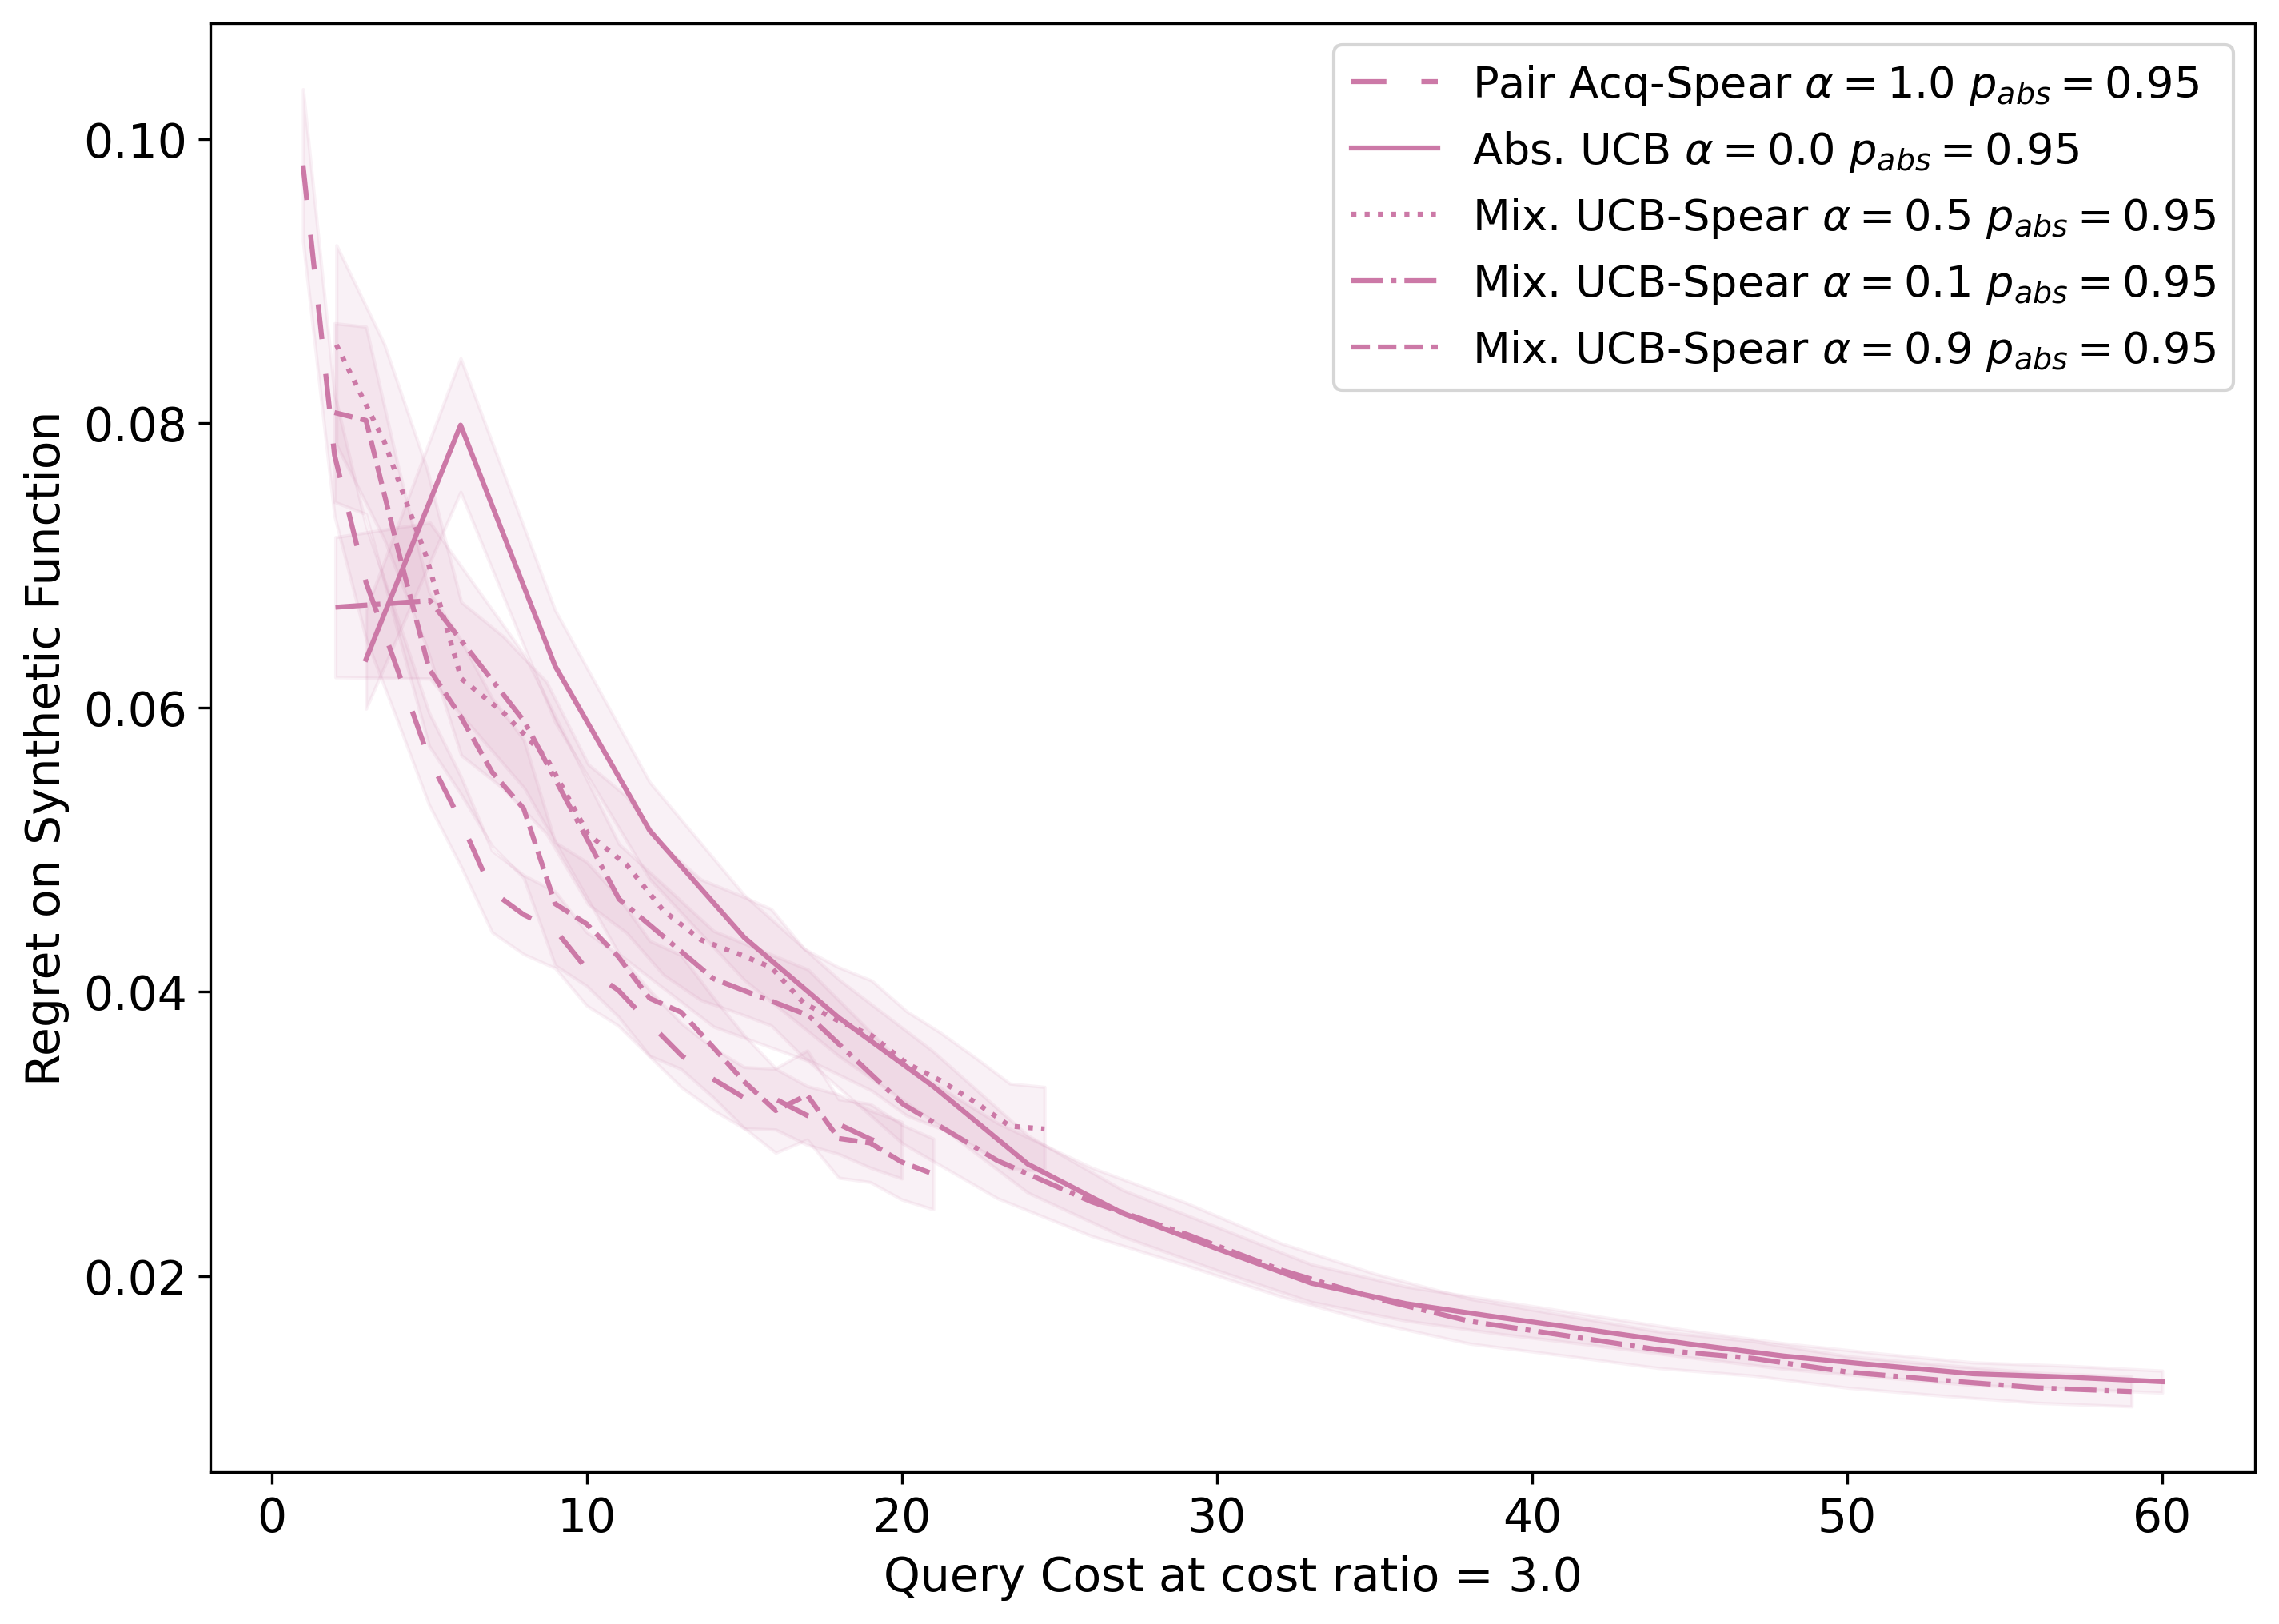

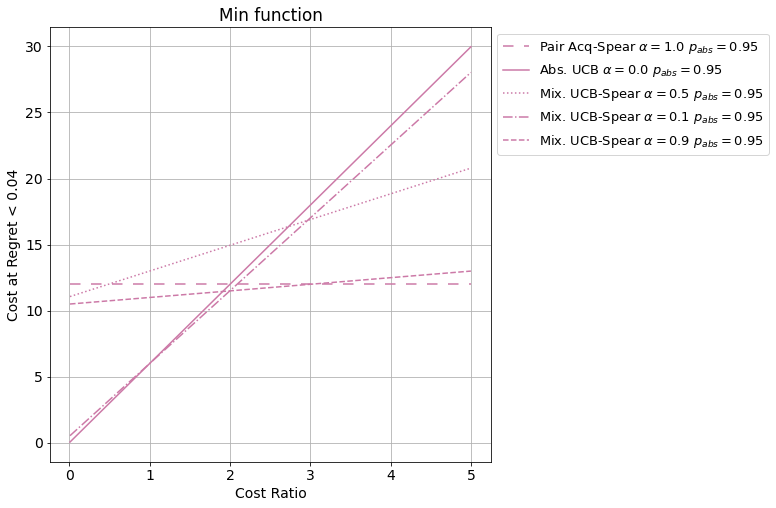

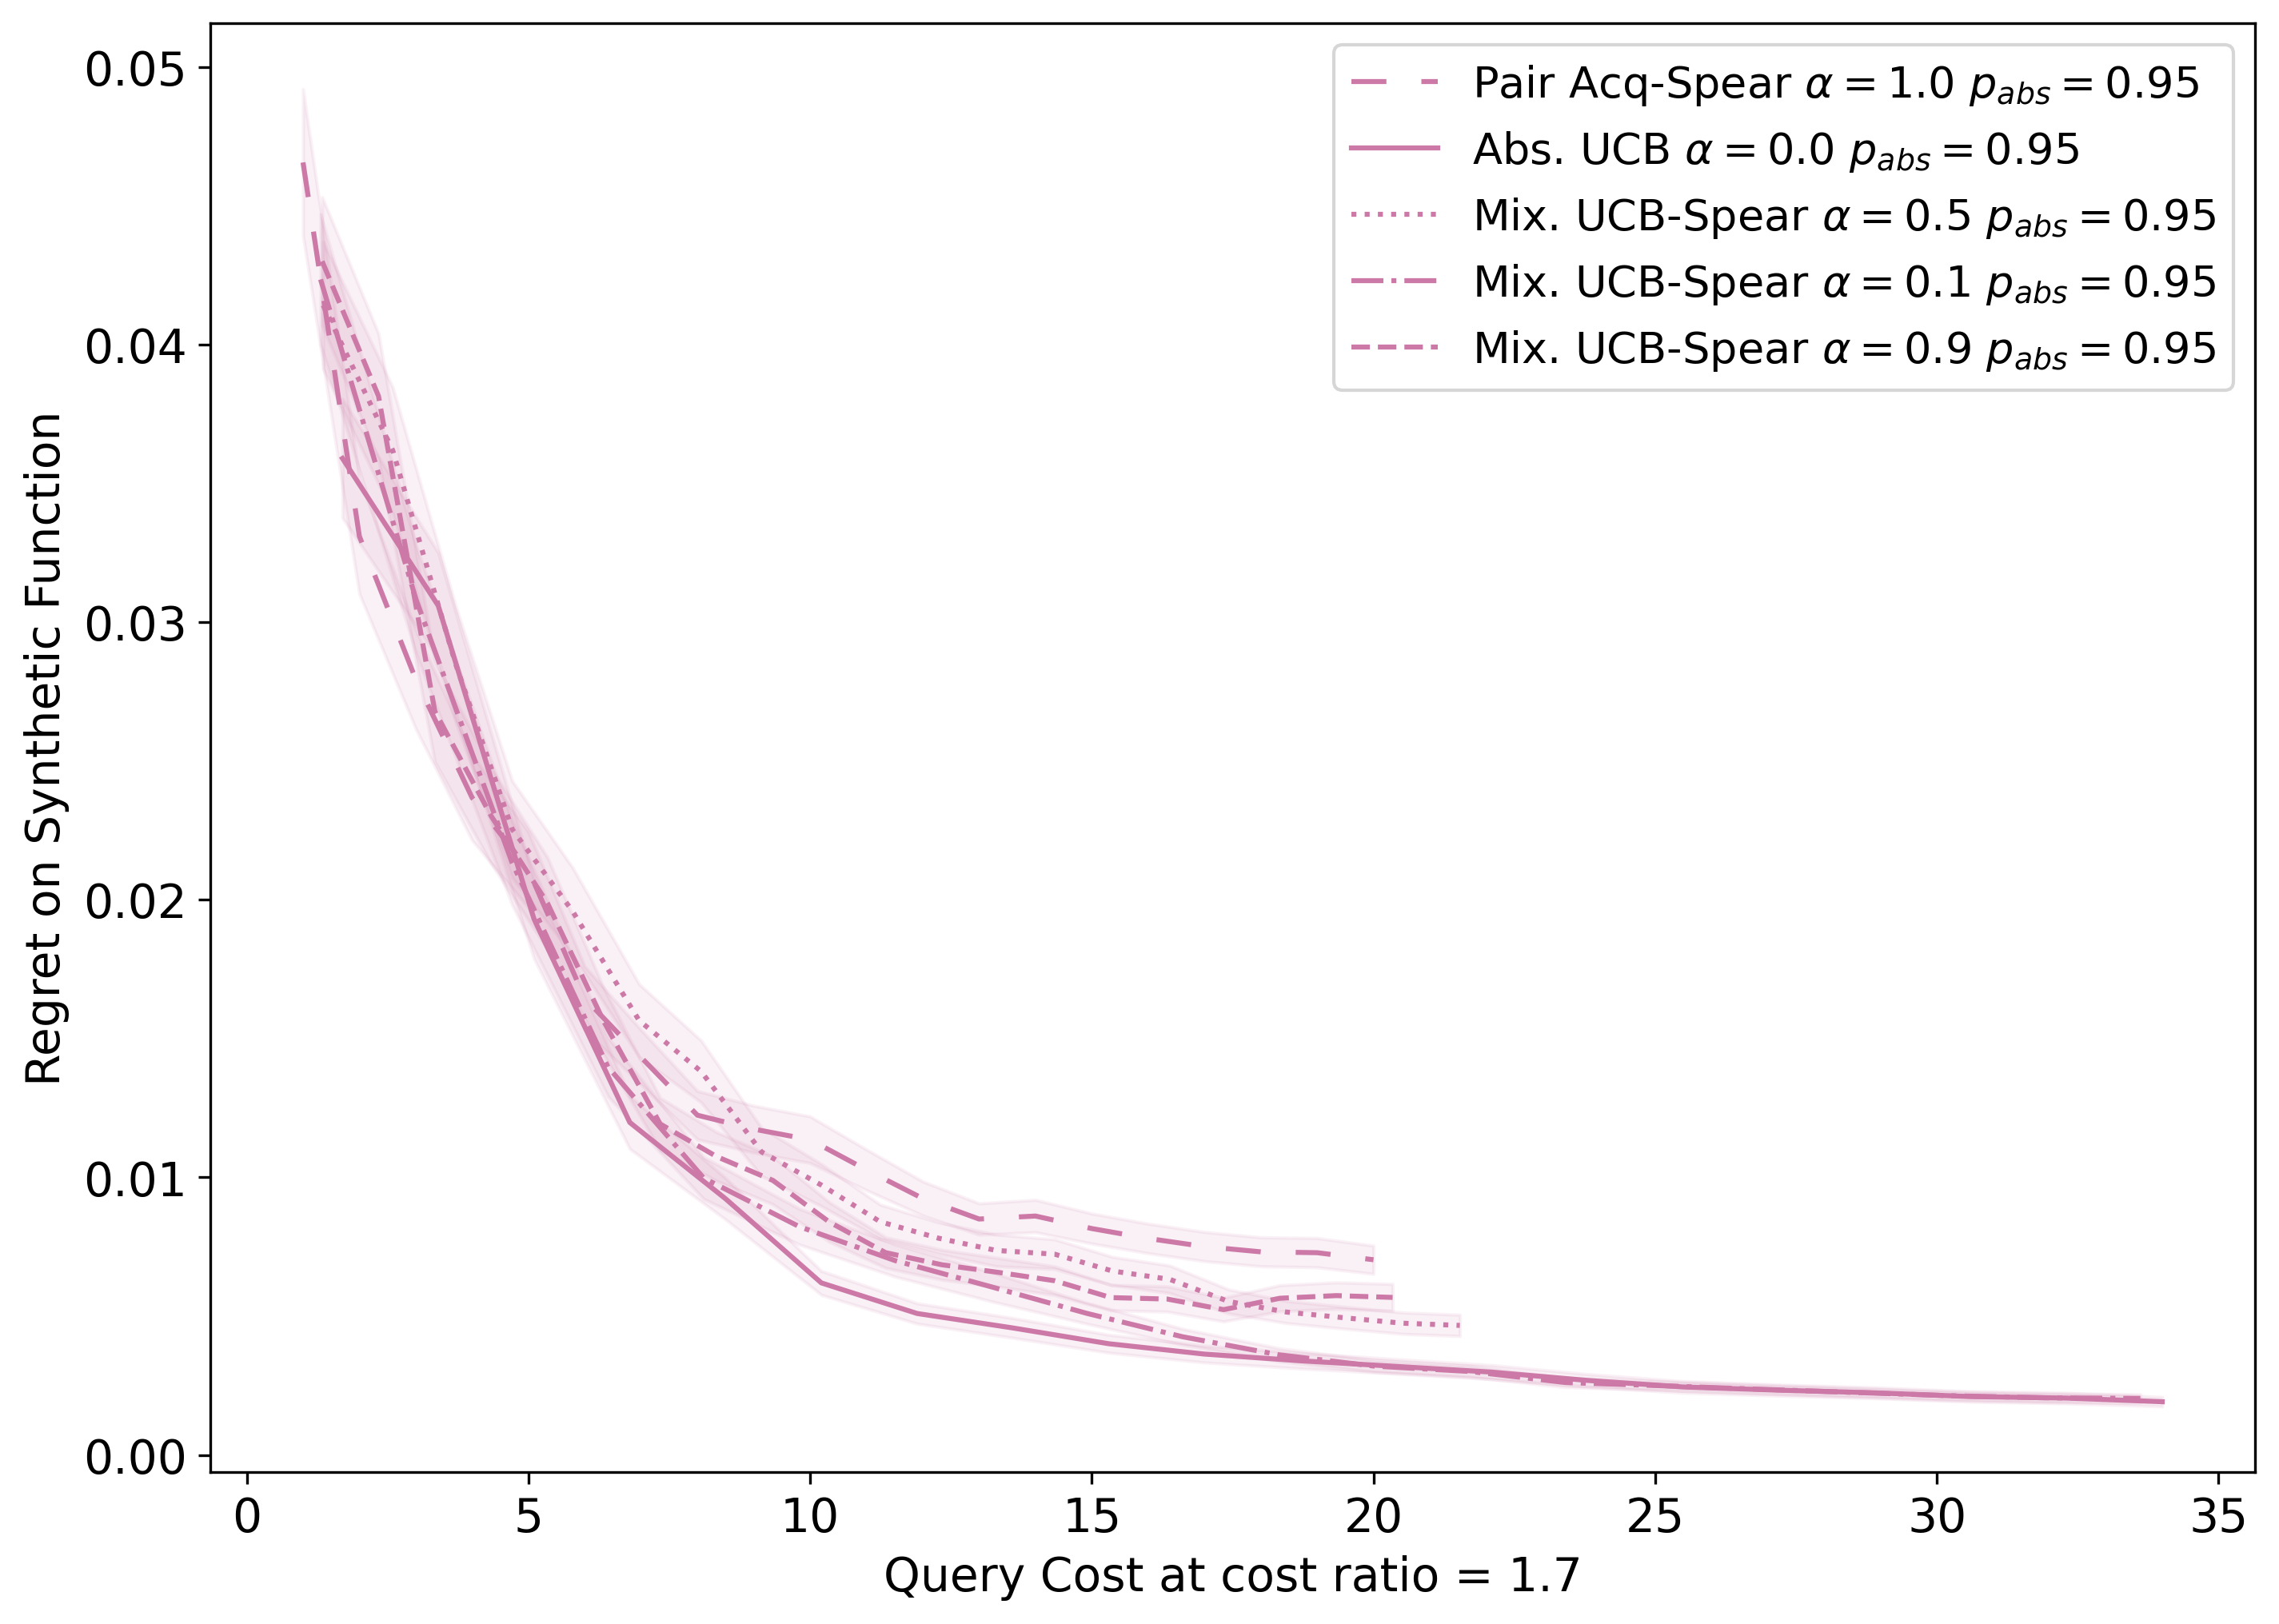

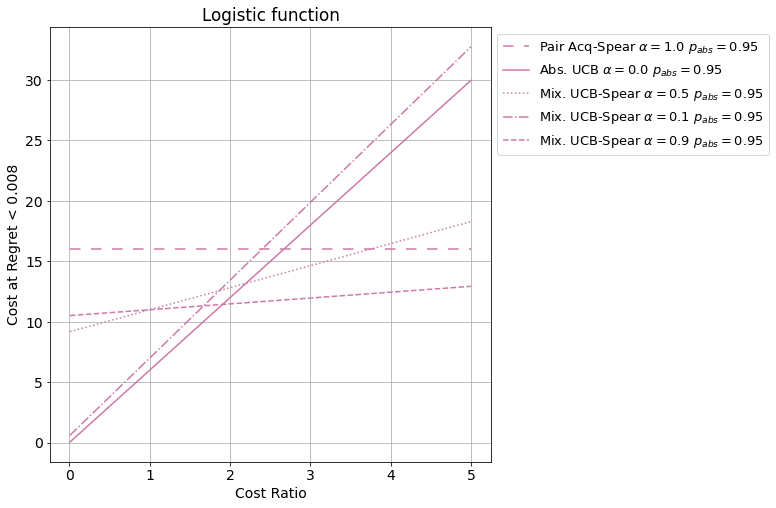

In [77]:

def selector_plot(selectors, show_avg_sel=False, fake_funcs=['min'], pabs_strs=['0.95'], cost_ratio=1.0, cost_at_point=0.035):
    user_types = ['human_choice']
    #after_time = '2024-10-15_18-00-00'
    #after_time = '2024-10-23_12-30-00'
    after_time = '2024-10-28_12-30-00'
    before_time = '2025-10-15_16-00-00'
    #before_time = '2024-10-23_12-30-00'

    pareto='False'

    models = ['gp']
    user = 'human_choice'
    select = 'switch'
    hypers = ['no']
    #hyper = hypers[0]

    plot_data = []

    plt.rc('font', size=14)
    plt.rc('ytick', labelsize=14)
    plt.rc('xtick', labelsize=14)


    linestyles=['-','--',':','-.']


    color_idx = 0
    line_style_idx = 0

    leg_txt = []

    show_avg_sel = show_avg_sel

    query_sizes = ['2']
    #vs=['50000.0', '2000.0', '60.0', '10.0']
    vs=['60.0']
    sigpairs=['0.1', '0.01']
    sigpairs = ['0.1']
    sigabss=['1.0']
    rbfls = ['1.2']

    rbfsigs = ['1.0']
    kmeds = ['medrand']

    ppair_str = '0.95'
    #pabs_strs = ['0.95', '0.9', '0.85', '0.8', '0.7', '0.65']

    alphas = ['0.5', '0.1', '0.9']
    #alphas = ['0.5','0.9']
    fake_alphas = ['0.5']
    
    
    ax = plt.gca()
    if show_avg_sel:
        ax2 = ax.twinx()
        
    plt.figure(figsize=(11,7))
    
    ax_cost = plt.gca()

    for j, fake_func in enumerate(fake_funcs):
        line_style_idx = 0
        for i, selector in enumerate(selectors):
            for l, hyper in enumerate(hypers):
                for k, model in enumerate(models):
                    for m, v in enumerate(vs):
                        for n, sigpair in enumerate(sigpairs):
                            for o, sigabs in enumerate(sigabss):
                                for rbfl in rbfls:
                                    for rbfsig in rbfsigs:
                                        for query_size in query_sizes:
                                            for kmed in kmeds:
                                                for alpha in alphas:
                                                    for fake_alpha in fake_alphas:
                                                        for pabs_str in pabs_strs:
                                                            kmed_str = '_kmed_'+str(kmed)
                                                            if selector == 'ABS_RANDOM':
                                                                glob_selector = 'RANDOM'
                                                                select = 'rating'
                                                            elif selector == 'ABS_UCB':
                                                                glob_selector = 'UCB'
                                                                select = 'rating'
            #                                                 elif selector == 'ABS_ACQ_SPEAR':
            #                                                     glob_selector = selector
            #                                                     select = 'rating'
                                                            else:
                                                                glob_selector = selector
                                                                select = 'switch'


                                                            sub_str_alpha = '_falp_' + fake_alpha +'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+ '_alpha_' + alpha
                                                            if (selector == 'ABS_UCB' or selector == 'ACQ_SPEAR') and alpha == '0.5':
                                                                sub_str_alpha = '_falp_' + fake_alpha +'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+ '_alpha_' + '0.5'
                                        #if (selector in ['ABS_UCB', 'ACQ_SPEAR']) and alpha == '0.5':
                                                            #    sub_str_alpha = '_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair

                                                            glob_check = directory+'AT_'+glob_selector+'_model_'+model+'_'+select+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+kmed_str+'_ppair_' + ppair_str + '_pabs_'+ pabs_str + sub_str_alpha +'_rbfl_'+rbfl+'_rbfsig_'+\
                                                                            rbfsig+'_env*/train_data.npz'

                                                            print('\t'+glob_check)
                                                            files = glob(glob_check)
                                                            files = filter_by_time(files, before=before_time, after=after_time)

                                                            if len(files) > 0:
                                                                score_diffs = np.empty((0,21))
                                                                avg_selections = np.empty((0, 21))
                                                                for file in files:
                                                                    data_file = np.load(file)
                                                                    print(file)

                                                                    # read in score diff
                                                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))

                                                                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                                                                    if 'query_type_is_abs' in data_file:
                                                                        avg_selection = data_file['query_type_is_abs']
                                                                        #avg_selection = data_file['query_is_correct']
                                                                        avg_selections = np.append(avg_selections, avg_selection, axis=0)

                                                                print(score_diffs.shape)

                                                                itr_to_show = 21

                                                                mean_diffs = np.mean(score_diffs, axis=0)
                                                                std_diffs = np.std(score_diffs, axis=0)
                                                                print('standard diffs shape: '+ str(score_diffs.shape))
                                                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                                                print(mean_diffs.shape)

                                                                if 'query_type_is_abs' in data_file:
                                                                    mean_sels = np.mean(avg_selections, axis=0)
                                                                    std_sels = np.std(avg_selections, axis=0)
                                                                    std_error_mean_sels = std_sels / np.sqrt(avg_selections.shape[0])

                                                                x = np.arange(1,itr_to_show)

                                                                sigma_to_plot = 1.0

                                                                # get colors
                                                                #c1 = alpha_color_dict[alpha]
                                                                #s1 = sel_style_dict[selector]#pap_style_sel[selector]
                                                                if alpha == '0.9':
                                                                    if selector == 'ABS_UCB':
                                                                        s1 = '-'
                                                                    elif selector == 'ACQ_SPEAR':
                                                                        s1 =  (0, (7, 7, 7, 7, 7, 7))
                                                                    else:
                                                                        s1 = '--'
                                                                elif alpha == '0.1':
                                                                    s1 = '-.'
                                                                elif alpha == '0.5': 
                                                                    if selector == 'ABS_UCB':
                                                                        s1 = '-'
                
                                                                    elif selector == 'ACQ_SPEAR':
                                                                        s1 =  (0, (7, 7, 7, 7, 7, 7))
                                                                    else:
                                                                        s1 = ':'
                                                                        
                                                                c1 = p_color_dict[pabs_str]

                                                                c2 = c1#colors_dict[selector]
                                                                s2 = s1#'-.'

                                                                avg_cost = (1-np.mean(avg_selections, axis=0))*1 + np.mean(avg_selections, axis=0)*cost_ratio
                                                                
                                                                x = np.zeros(20, dtype=float)
                                                                x[0] = avg_cost[1]
                                                                for i_cost in range(1, len(x)):
                                                                    x[i_cost] = x[i_cost-1] + avg_cost[i_cost+1]
                                                                        
                                                                
                                                                
                                                                cost_ratios, costs_at = generate_cost_ratio_plot(mean_diffs, np.mean(avg_selections,axis=0), cost_at_point)
                                                                ax_cost.plot(cost_ratios, costs_at, color=c1, linestyle=s1)
                                                                
                                                                
                                                                ax.fill_between(x, \
                                                                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                                        color=c1, \
                                                                                        alpha=0.1, \
                                                                                        label='_nolegend_')
                                                                ax.plot(x, mean_diffs[1:itr_to_show], color=c1, linestyle=s1)

                                                                if 'query_type_is_abs' in data_file and show_avg_sel:
                #                                                     ax2.fill_between(x, \
                #                                                                             mean_sels[1:itr_to_show]-(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
                #                                                                             mean_sels[1:itr_to_show]+(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
                #                                                                             color=c1, \
                #                                                                             alpha=0.1, \
                #                                                                             label='_nolegend_')
                                                                    #mean_sels = [np.mean(mean_sels)] * len(mean_sels)
                                                                    ax2.plot(x, mean_sels[1:itr_to_show], color=c2, linestyle=s2, label='_nolegend_')
                                                                    ax2.set_ylabel('Selecting pair or abs abs=1, pair=0')
                                                                    #ax2.set_ylabel('Training data was correct')

                                                                alpha_disp = alpha
                                                                if selector == 'ABS_UCB':
                                                                    alpha_disp = '0.0'
                                                                if (selector == 'ACQ_SPEAR') or (selector == 'ACQ_RHO') or (selector == 'ACQ_EPIC') or (selector == 'ACQ_LL'):
                                                                    alpha_disp = '1.0'
                                
                                                                selector_text = selector_text_f(selector) + r' $ \alpha =$'+str(alpha_disp) + r' $p_{abs}=$' + str(pabs_str)
                                                                leg = selector_text
                                                                leg_txt.append(leg)

                                                                color_idx += 1
                                                                line_style_idx += 1





    print(leg_txt)
    ax.legend(leg_txt, bbox_to_anchor=(1.0, 1.0), prop={'size': 13})
    ax_cost.legend(leg_txt, bbox_to_anchor=(1.0, 1.0), prop={'size': 13})
    ax_cost.set_xlabel('Cost Ratio')
    ax_cost.set_ylabel('Cost at Regret < ' + str(cost_at_point))
    
    #plt.xlabel('Query Cost')
    ax.set_ylabel('Regret on Synthetic Function')
    ax.set_xlabel('Query Cost at cost ratio = ' + str(cost_ratio))
    #plt.title('Regret on geologist domain (GP model)')
    step_size = int(np.round(20 / 20*cost_ratio))
    #plt.xticks(np.arange(1,21*cost_ratio,step_size))

    plt.grid()

    plt.tight_layout()
    

##### Generate all of the figures

figsize=(7,5)
figsize_l=(11,8)
dpi=300

plt.figure(figsize=figsize_l, dpi=dpi)
selector_plot(['ACQ_SPEAR', 'ABS_UCB', 'SW_UCB_SPEAR'], False, ['min'], ['0.95'], 
                  cost_ratio=3.0, cost_at_point=0.04)
plt.title('Min function')

plt.figure(figsize=figsize_l, dpi=dpi)
selector_plot(['ACQ_SPEAR', 'ABS_UCB', 'SW_UCB_SPEAR'], False, ['logistic'], ['0.95'], 
                  cost_ratio=1.7, cost_at_point=0.008)
plt.title('Logistic function')

# plt.figure(figsize=figsize_l, dpi=dpi)
# selector_plot(['ACQ_SPEAR', 'ABS_UCB', 'SW_UCB_SPEAR'], False, ['linear'], ['0.95'], 
#                   cost_ratio=3.0, cost_at_point=0.04)
# plt.title('Min function')



# plt.figure(figsize=figsize, dpi=dpi)
# selector_plot(['ABS_UCB', 'SW_UCB_SPEAR'], True, ['linear'])
# plt.title('linear function')

# plt.figure(figsize=figsize, dpi=dpi)
# selector_plot(['ABS_UCB', 'SW_UCB_SPEAR'], False, ['linear'])
# plt.title('linear function')

plt.show()